#SALES PREDICTION USING PYTHON

-- Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.


-- In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('/content/advertising (2).csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.shape

(200, 4)

In [ ]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

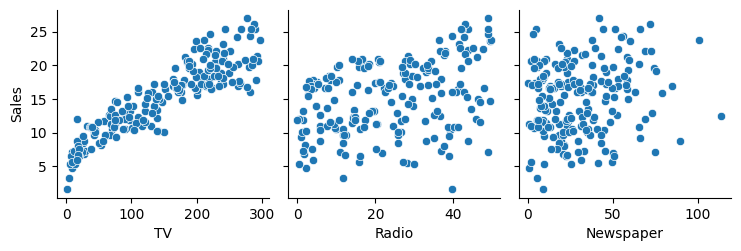

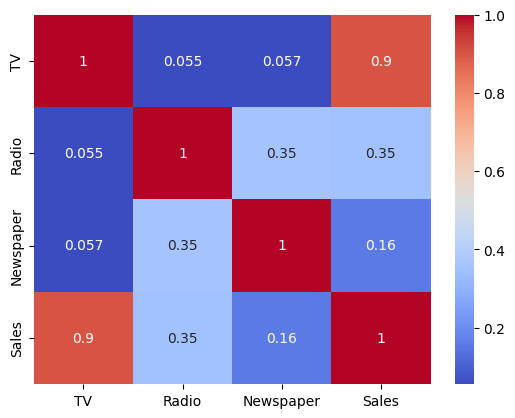

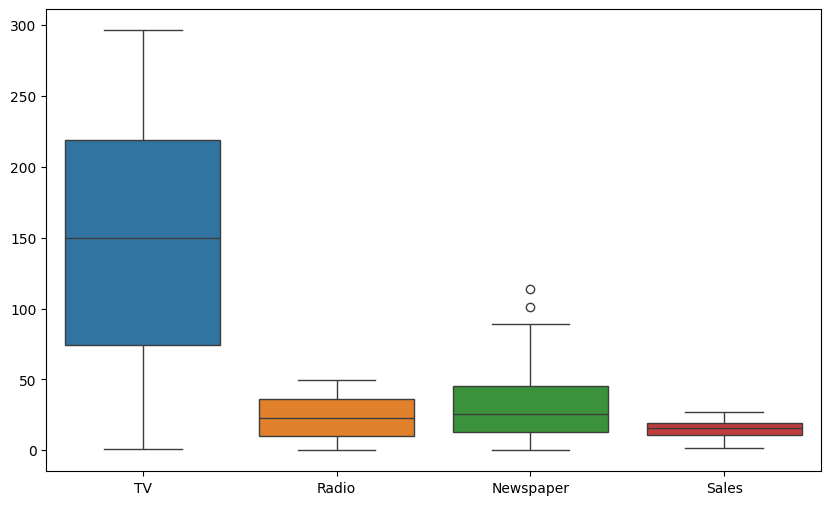

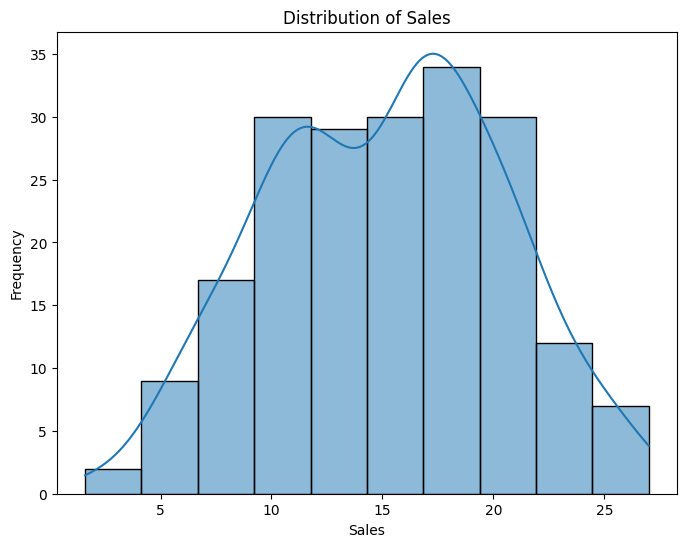

In [ ]:
# Visualize the relationship between features and sales
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

# Visualize the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Box plot of Sales by different advertising channels
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient="v")
plt.show()

# Histogram of Sales
plt.figure(figsize=(8,6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

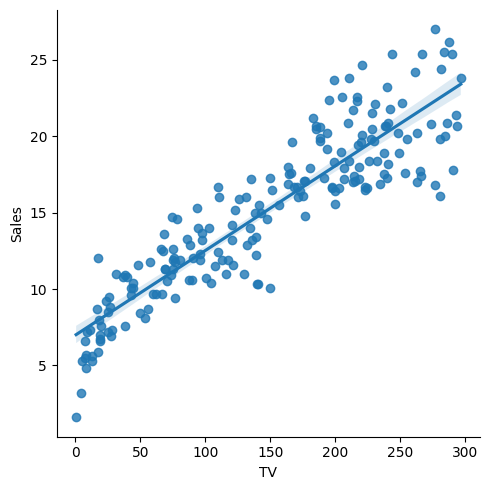

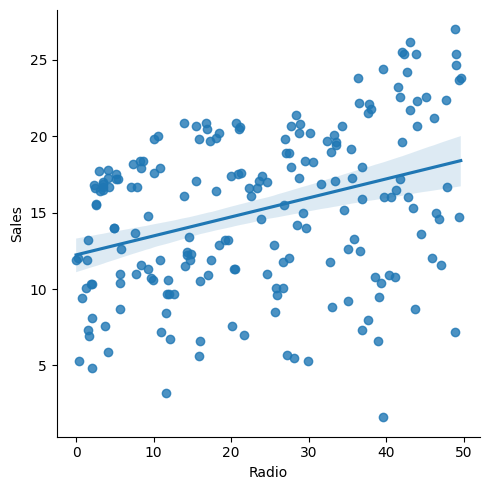

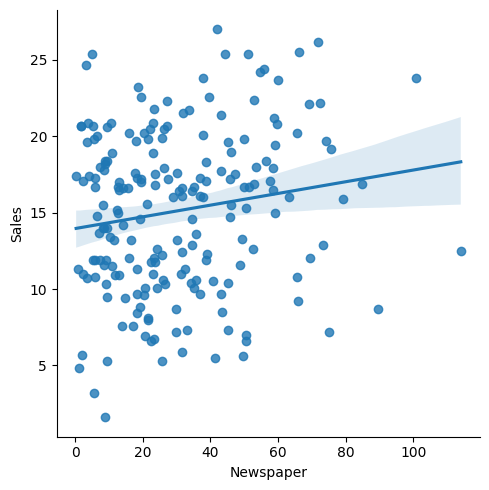

In [ ]:
# Create the LM plot
sns.lmplot(x='TV', y='Sales', data=df)
plt.show()

sns.lmplot(x='Radio', y='Sales', data=df)
plt.show()

sns.lmplot(x='Newspaper', y='Sales', data=df)
plt.show()

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

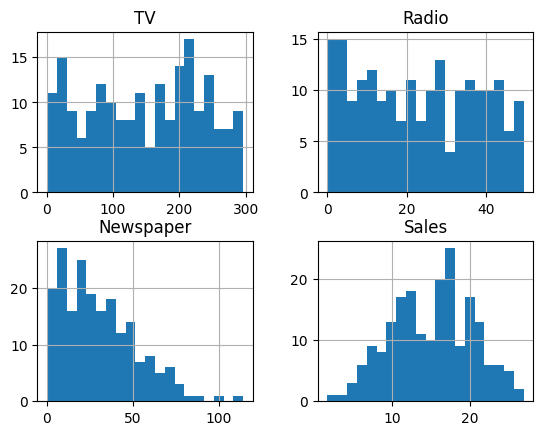

In [ ]:
# Histograms to check the normality assumption of the dependent variable (Sales)

df.hist(bins=20)

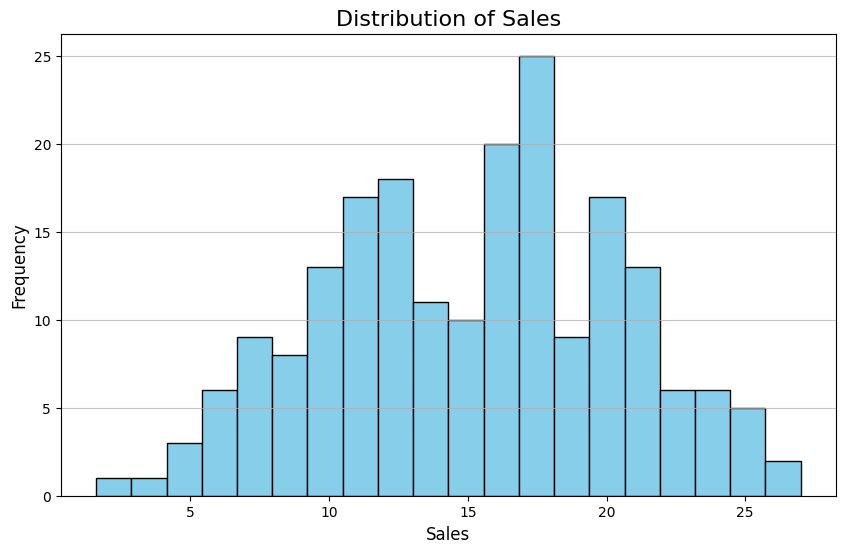

In [ ]:
# Histogram of Sales with more customization
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=20, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Sales', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)  # Add a grid for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df[['TV']],df[['Sales']],test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [ ]:
print(x_train)

        TV
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[160 rows x 1 columns]


In [ ]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

        TV
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[160 rows x 1 columns]
        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
     Sales
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[160 rows x 1 columns]
     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   

In [ ]:
# LogisticRegression
lr=LogisticRegression()
# Convert the target variable to discrete values before fitting the model.
# Assuming 'Sales' is your target variable in 'y_train' and 'y_test':
# y_train_discrete = pd.qcut(y_train['Sales'], q=2, labels=[0, 1])  # Example: Discretize into 2 bins
# y_test_discrete = pd.qcut(y_test['Sales'], q=2, labels=[0, 1])  # Example: Discretize into 2 bins
lr.fit(x_train,y_train_discrete)

LogisticRegression()

In [ ]:
x_train_pred=lr.predict(x_train)
print(x_train_pred)


[0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1
 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0
 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 0 1 0 1 1 1 1 0 0 0 1 0]


In [ ]:
x_test_pred=lr.predict(x_test)
print(x_test_pred)

[1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0
 1 0 0]


In [ ]:
print(y_train)

     Sales
79    11.0
197   14.8
38    10.1
24     9.7
122   16.6
..     ...
106    7.2
14    19.0
92    19.4
179   17.6
102   19.8

[160 rows x 1 columns]


In [ ]:
print(lr.coef_)
print(lr.intercept_)

[[0.08986919]]
[-13.82980119]


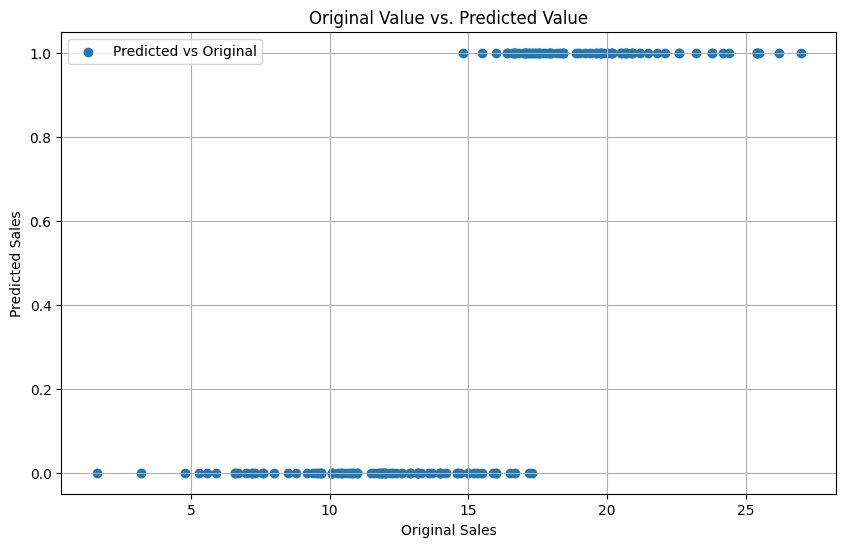

In [ ]:
# original value vs predicate value graph
# Assuming x_train, y_train, x_train_pred are defined as in the previous code
# and y_train is the original target variable
plt.figure(figsize=(10, 6))
plt.scatter(y_train, x_train_pred, label='Predicted vs Original')
plt.xlabel("Original Sales")
plt.ylabel("Predicted Sales")
plt.title("Original Value vs. Predicted Value")
plt.legend()
plt.grid(True)
plt.show()

[0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1
 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0
 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 0 1 0 1 1 1 1 0 0 0 1 0]
[0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0
 1 0 0]
134    0
66     0
26     0
113    1
168    1
      ..
67     0
192    0
117    0
47     1
172    0
Name: Sales, Length: 160, dtype: category
Categories (2, int64): [0 < 1]
[[0.06555757]]
[-10.41639866]
Accuracy on training data :  0.94375
Accuracy on test data :  0.925


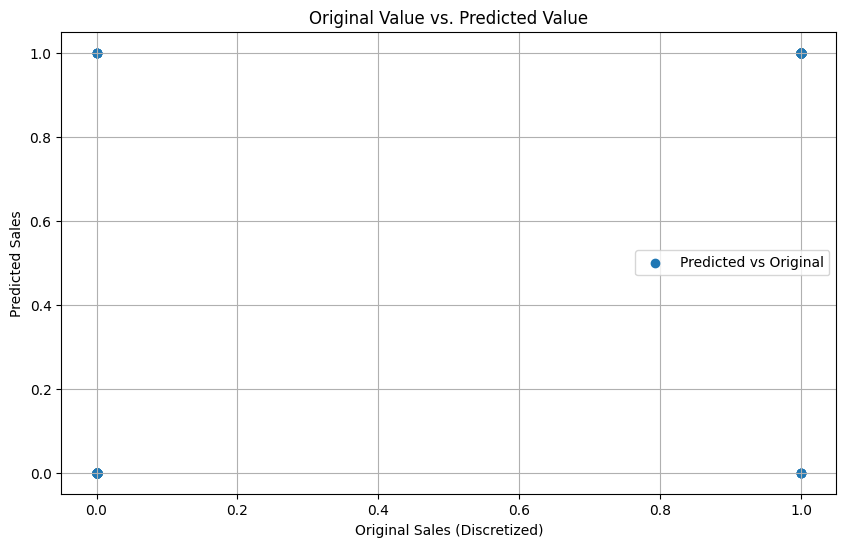

In [ ]:
# Discretize the target variable
y_train_discrete = pd.qcut(y_train['Sales'], q=2, labels=[0, 1])
y_test_discrete = pd.qcut(y_test['Sales'], q=2, labels=[0, 1])

lr.fit(x_train, y_train_discrete)
x_train_pred = lr.predict(x_train)
print(x_train_pred)

x_test_pred = lr.predict(x_test)
print(x_test_pred)

print(y_train_discrete) # Print the discretized target variable

print(lr.coef_)
print(lr.intercept_)

# Calculate accuracy
training_data_accuracy = accuracy_score(y_train_discrete, x_train_pred)
print('Accuracy on training data : ', training_data_accuracy)

test_data_accuracy = accuracy_score(y_test_discrete, x_test_pred)
print('Accuracy on test data : ', test_data_accuracy)

# original value vs predicate value graph
plt.figure(figsize=(10, 6))
plt.scatter(y_train_discrete, x_train_pred, label='Predicted vs Original')
plt.xlabel("Original Sales (Discretized)")
plt.ylabel("Predicted Sales")
plt.title("Original Value vs. Predicted Value")
plt.legend()
plt.grid(True)
plt.show()